In [17]:
import pandas as pd
import numpy as np

In [1]:
adding = True
increment = 0

while adding == True:
    try:
        df = pd.read_json('cl{}.json'.format(increment))
        increment += 1
    except:
        adding = False
    

import scrapy
from scrapy.crawler import CrawlerProcess


class CLSpider(scrapy.Spider):
    # Naming the spider is important if you are running more than one spider of
    # this class simultaneously.
    name = "CL"
    
    # URL(s) to start with.
    allowed_domains = ["losangeles.craigslist.org"]
    start_urls = [
        'https://losangeles.craigslist.org/search/msa?query=bass%20guitar',
    ]

    # Use XPath to parse the response we get.
    def parse(self, response):
        
        # Iterate over every <article> element on the page.
        for posting in response.xpath('//p[@class="result-info"]'):
            
            # Yield a dictionary with the values we want.
            yield {
                # This is the code to choose what we want to extract
                # You can modify this with other Xpath expressions to extract other information from the site
                'title': posting.xpath('a[@class="result-title hdrlnk"]/text()').extract_first(),
                'date': posting.xpath('time[@class="result-date"]/text()').extract_first(),
                'price': posting.xpath('span/span[@class="result-price"]/text()').extract_first(),
                'location': posting.xpath('span/span[@class="result-hood"]/text()').extract_first()
            }
        
        suffix = response.xpath('//a[@title="next page"]/@href').extract_first()
        print(suffix)
        next_page = response.urljoin(suffix)
        print(next_page)
        
        # Recursively calling the spider to process the next ten entries, if they exist.
        if next_page is not None:
            
            """next_page = '{}&lhcontinue={}'.format(self.start_urls[0],next_page)"""
            yield scrapy.Request(next_page, callback=self.parse)
        

# Tell the script how to run the crawler by passing in settings.
process = CrawlerProcess({
    'FEED_FORMAT': 'json',         # Store data in JSON format.
    'FEED_URI': 'cl{}.json'.format(increment),  # Name our storage file.
    'ROBOTSTXT_OBEY': True,
    'USER_AGENT': 'ThinkfulDataScienceBootcamp (thinkful.com)',
    'AUTOTHROTTLE_ENABLED': True,
    'HTTPCACHE_ENABLED': True,
    'LOG_ENABLED': False           # Turn off logging for now.
})

# Start the crawler with our spider.
process.crawl(CLSpider)
process.start()
print('\nCrawl Ended')


/search/msa?s=120&query=bass%20guitar
https://losangeles.craigslist.org/search/msa?s=120&query=bass%20guitar
/search/msa?s=240&query=bass%20guitar
https://losangeles.craigslist.org/search/msa?s=240&query=bass%20guitar
/search/msa?s=360&query=bass%20guitar
https://losangeles.craigslist.org/search/msa?s=360&query=bass%20guitar
/search/msa?s=480&query=bass%20guitar
https://losangeles.craigslist.org/search/msa?s=480&query=bass%20guitar

https://losangeles.craigslist.org/search/msa?s=480&query=bass%20guitar

Crawl Ended


In [136]:
import pandas as pd

# Checking whether we got data 

df = pd.read_json('cl{}.json'.format(increment), orient='records')
print(df.shape)
print(df.tail())

(573, 4)
       date             location price  \
568  Feb  3   (San Fernando, CA)   $55   
569  Feb 21         (Northridge)  None   
570  Feb 14         (Northridge)  None   
571  Feb  5         (Northridge)  None   
572  Jan 31         (Northridge)  None   

                                                 title  
568  SOUND PANELS FOR YOUR RECORDING STUDIO, MIXING...  
569                 STORE CLOSING...Save up to 70% OFF  
570                 STORE CLOSING...Save up to 70% OFF  
571                 STORE CLOSING...Save up to 70% OFF  
572                 STORE CLOSING...Save up to 70% OFF  


### EDA

In [137]:
df

,date,location,price,title
0,Mar 2,(VAN NUYS),$2100,Bossa bass guitar
1,Mar 2,(Torrance),$400,Ibanez SR500 Bass Guitar (Case included)
2,Mar 2,None,$42,Hartke Bass Guitar Amp B15
3,Mar 2,(4579 W PICO BLVD),$99,Digitech X-Series Bass Synth Wah Envelope Filt...
4,Mar 2,(Redondo Beach),None,Fender Strat MIJ Gibson Epiphone Les Paul Elec...
5,Mar 2,(Hollywood),$150,Bass Guitar Fender (Squier) P-Bass Excellent C...
6,Mar 2,(Super SURF also),$450,Best Speaker Cab for Guitar or Bass JBL D130s/...
7,Mar 2,(Tustin),$39,Eminence 10 inch bass guitar speaker 4 ohms New
8,Mar 2,(Altadena),$25,"Local Apprentice Luthier,,, Guitar/Bass repair..."
9,Mar 2,(Baldwin Hills),$20,9 random guitar/bass straps-various conditions


In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 573 entries, 0 to 572
Data columns (total 4 columns):
date        573 non-null object
location    504 non-null object
price       537 non-null object
title       573 non-null object
dtypes: object(4)
memory usage: 18.0+ KB


In [138]:
# Find indices with no price listing

df[df['price'].isnull()].index

Int64Index([  4,  34,  62,  91,  97, 125, 141, 147, 202, 229, 246, 262, 281,
            296, 297, 302, 308, 318, 322, 356, 416, 420, 428, 429, 434, 452,
            526, 538, 551, 556, 564, 565, 569, 570, 571, 572],
           dtype='int64')

In [140]:
# Drop listings with no price

df2 = df.drop(df[df['price'].isnull()].index)
df2.price = df2.price.str.replace('$', '').apply(lambda x: np.round(float(x), 2))

In [141]:
df2.head()

,date,location,price,title
0,Mar 2,(VAN NUYS),2100.0,Bossa bass guitar
1,Mar 2,(Torrance),400.0,Ibanez SR500 Bass Guitar (Case included)
2,Mar 2,None,42.0,Hartke Bass Guitar Amp B15
3,Mar 2,(4579 W PICO BLVD),99.0,Digitech X-Series Bass Synth Wah Envelope Filt...
5,Mar 2,(Hollywood),150.0,Bass Guitar Fender (Squier) P-Bass Excellent C...


In [142]:
df2.price.describe()

count    5.370000e+02
mean     2.305996e+05
std      5.327524e+06
min      1.000000e+00
25%      1.000000e+02
50%      2.990000e+02
75%      7.500000e+02
max      1.234568e+08
Name: price, dtype: float64

In [143]:
df2.price.sort_values(ascending=False).head()

374    123456789.0
449        30000.0
186        27000.0
160        12345.0
69          7000.0
Name: price, dtype: float64

In [149]:
df2.price.sort_values().head()

425    1.0
158    1.0
412    1.0
293    1.0
470    1.0
Name: price, dtype: float64

In [150]:
# Get rid of frivolous price number.

df2 = pd.DataFrame(df2[(df2['price'] < 30000) & (df2['price'] > 1)])

In [151]:
df2.index=np.arange(len(df2))

In [152]:
df2.location = df2.location.fillna('Greater Los Angeles Area')
df2.location = df2.location.str.replace(', CA', '')
df2.location = df2.location.str.replace('(', '')
df2.location = df2.location.str.replace(')', '')
df2.location = df2.location.str.lower()

In [153]:
df2.title = df2.title.str.lower()

In [154]:
df2

,date,location,price,title
0,Mar 2,van nuys,2100.0,bossa bass guitar
1,Mar 2,torrance,400.0,ibanez sr500 bass guitar (case included)
2,Mar 2,greater los angeles area,42.0,hartke bass guitar amp b15
3,Mar 2,4579 w pico blvd,99.0,digitech x-series bass synth wah envelope filt...
4,Mar 2,hollywood,150.0,bass guitar fender (squier) p-bass excellent c...
5,Mar 2,super surf also,450.0,best speaker cab for guitar or bass jbl d130s/...
6,Mar 2,tustin,39.0,eminence 10 inch bass guitar speaker 4 ohms new
7,Mar 2,altadena,25.0,"local apprentice luthier,,, guitar/bass repair..."
8,Mar 2,baldwin hills,20.0,9 random guitar/bass straps-various conditions
9,Mar 2,lax,120.0,bass guitar case


In [155]:
df2.location.value_counts()

greater los angeles area                  59
 los angeles                              41
 long beach                               15
 north hollywood                          14
 van nuys                                 13
 sherman oaks                             13
 reseda                                   12
 canoga park                              11
 el segundo                               10
 la verne                                  9
 glendale                                  9
 echo park                                 9
 studio city                               8
 burbank                                   8
 pasadena                                  8
 los angeles / hollywood                   8
 santa monica                              8
 santa clarita                             7
 venice                                    7
 northridge                                6
 calabasas/malibu                          6
 covina                                    6
 sfv      

In [156]:
def matchstring(x, y):
    """Return 1 if word y is in string x, else return 0"""
    match = 0
    if type(y) == str:
        if y in x:
            match = 1
    elif type(y) == list:
        for item in y:
            if item in x:
                match = 1
    return match


In [157]:
df2['amp'] = df2['title'].apply(lambda x: matchstring(x, ['amp', 'amplifier', 'head', 'cabinet']))
df2['pedal'] = df2['title'].apply(lambda x: matchstring(x, ['effects', 'pedal']))
df2['case'] = df2['title'].apply(lambda x: matchstring(x, 'case'))
df2['synth'] = df2['title'].apply(lambda x: matchstring(x, 'synth'))
df2['electric'] = df2['title'].apply(lambda x: matchstring(x, 'electric'))
df2['acoustic'] = df2['title'].apply(lambda x: matchstring(x, 'acoustic'))
df2['extended'] = df2['title'].apply(lambda x: matchstring(x, ['5-string', '6-string',
                                                              '5 string', '6 string']))
df2['fretless'] = df2['title'].apply(lambda x: matchstring(x, 'fretless'))
df2['guitar'] = df2['title'].apply(lambda x: matchstring(x, 'guitar'))
df2['gibson'] = df2['title'].apply(lambda x: matchstring(x, 'gibson'))
df2['fender'] = df2['title'].apply(lambda x: matchstring(x, 'fender'))
df2['ibanez'] = df2['title'].apply(lambda x: matchstring(x, 'ibanez'))
df2['schecter'] = df2['title'].apply(lambda x: matchstring(x, 'schecter'))
df2['godin'] = df2['title'].apply(lambda x: matchstring(x, 'godin'))
df2['esp'] = df2['title'].apply(lambda x: matchstring(x, 'esp'))

In [158]:
df2

,date,location,price,title,amp,pedal,case,synth,electric,acoustic,extended,fretless,guitar,gibson,fender,ibanez,schecter,godin,esp
0,Mar 2,van nuys,2100.0,bossa bass guitar,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,Mar 2,torrance,400.0,ibanez sr500 bass guitar (case included),0,0,1,0,0,0,0,0,1,0,0,1,0,0,0
2,Mar 2,greater los angeles area,42.0,hartke bass guitar amp b15,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,Mar 2,4579 w pico blvd,99.0,digitech x-series bass synth wah envelope filt...,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0
4,Mar 2,hollywood,150.0,bass guitar fender (squier) p-bass excellent c...,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
5,Mar 2,super surf also,450.0,best speaker cab for guitar or bass jbl d130s/...,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
6,Mar 2,tustin,39.0,eminence 10 inch bass guitar speaker 4 ohms new,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
7,Mar 2,altadena,25.0,"local apprentice luthier,,, guitar/bass repair...",0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
8,Mar 2,baldwin hills,20.0,9 random guitar/bass straps-various conditions,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
9,Mar 2,lax,120.0,bass guitar case,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0


In [159]:
df2[df2['fretless'] == True]

,date,location,price,title,amp,pedal,case,synth,electric,acoustic,extended,fretless,guitar,gibson,fender,ibanez,schecter,godin,esp
66,Feb 28,greater los angeles area,7000.0,ken bebensee unique 6 string fretless bass gui...,0,0,1,0,0,0,1,1,1,0,0,0,0,0,0
85,Feb 28,west hollywood,2500.0,bossa 5 string fretless bass guitar vintage ne...,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0
87,Feb 27,van nuys,139.0,yamaha rbx200f fretless bass guitar,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0
206,Mar 1,los angeles,50.0,fretless bass,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [160]:
df2[df2['extended'] == True]

,date,location,price,title,amp,pedal,case,synth,electric,acoustic,extended,fretless,guitar,gibson,fender,ibanez,schecter,godin,esp
11,Mar 2,sfv,1100.0,tune twb 6 string bass guitar,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
42,Mar 1,van nuys,475.0,esp ltd surveyor 415 5-string electric bass gu...,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1
56,Mar 1,los angeles / hollywood,500.0,1990 fender hm 5 string jazz bass guitar made ...,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0
57,Mar 1,los angeles / hollywood,249.0,sterling by music man sub series 5 string bass...,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
58,Mar 1,los angeles,445.0,schecter diamond series elite 5 string bass gu...,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0
59,Mar 1,los angeles,445.0,schecter diamond series elite 5 string bass gu...,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0
66,Feb 28,greater los angeles area,7000.0,ken bebensee unique 6 string fretless bass gui...,0,0,1,0,0,0,1,1,1,0,0,0,0,0,0
85,Feb 28,west hollywood,2500.0,bossa 5 string fretless bass guitar vintage ne...,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0
113,Feb 25,pacoima,475.0,traben phoenix 5 string electric bass guitar,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0
116,Feb 25,greater los angeles area,225.0,ibanez gsr 206 6-string bass guitar,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0


In [161]:
import matplotlib.pyplot as plt
import seaborn as sns

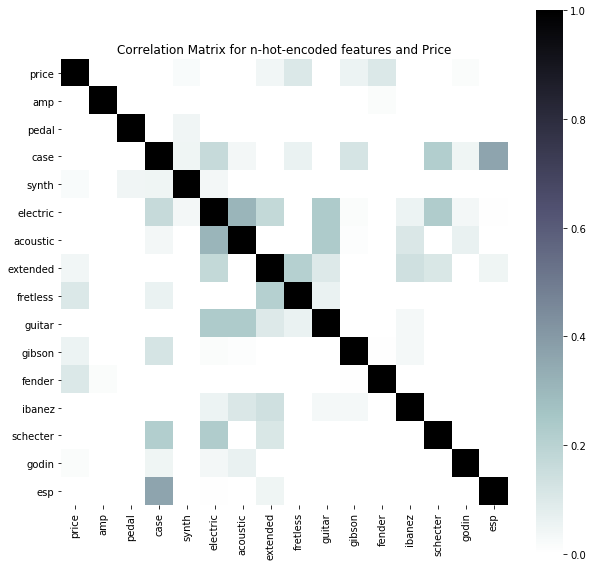

In [163]:
plt.rcParams['figure.figsize'] = 10, 10

plt.title('Correlation Matrix for n-hot-encoded features and Price')
sns.heatmap(df2.drop(['location', 'date', 'title'], 1).corr(), cmap='bone_r',
           square=True, vmin=0, vmax=1)

plt.show()

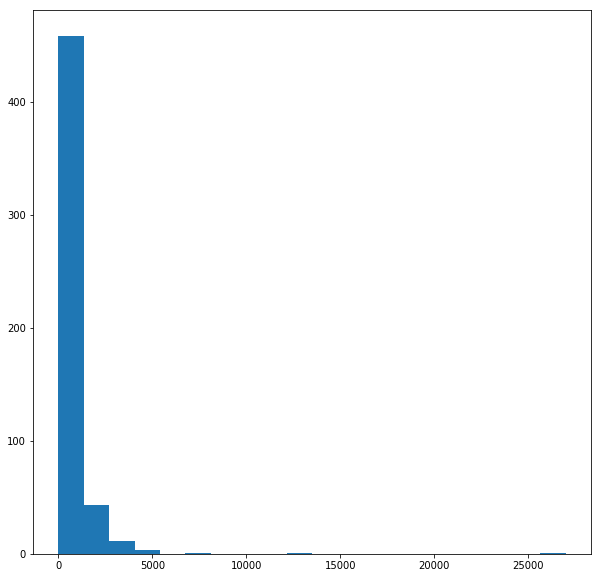

In [164]:
plt.hist(df2['price'], bins=20)
plt.show()

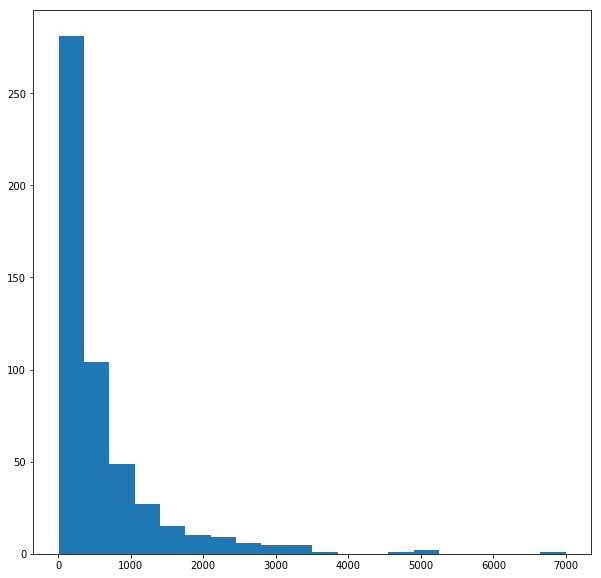

In [165]:
plt.hist(df2[df2['price'] < 10000]['price'], bins=20)
plt.show()

In [167]:
price_df = pd.DataFrame(df2.groupby('location').mean().sort_values(by='price', ascending=False))
price_df

,price,amp,pedal,case,synth,electric,acoustic,extended,fretless,guitar,gibson,fender,ibanez,schecter,godin,esp
location,,,,,,,,,,,,,,,,
venice,4547.142857,0.142857,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.285714,0.000,0.428571,0.000000,0.142857,0.000000,0.0
garden grove,2850.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.0
northridge,2848.833333,0.166667,0.000000,0.000000,0.000000,0.166667,0.166667,0.166667,0.000000,0.666667,0.000,0.000000,0.000000,0.000000,0.000000,0.0
westlake village,2512.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000,0.000000,0.000000,0.000000,0.000000,0.0
south coastal,2500.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.0
burbank/ north hollywood,2400.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.0
sfv/simi,2100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.0
1118 w. magnolia,1935.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.500,0.000000,0.000000,0.000000,0.000000,0.0
agoura,1800.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.0
